In [6]:
using DelimitedFiles
using PyCall
using PyPlot
using Statistics
using DataFrames
using CSV

In [7]:
#cont = readdlm("../data/figures/suppl_data_fig3/cont")
#entren = readdlm("../data/figures/suppl_data_fig3/entren")
X = readdlm("../data/figures/suppl_data_fig3/x_steps")[:]
mut_df = CSV.read("../data/figures/suppl_data_fig3/cont_entr_df.csv", DataFrame)
;

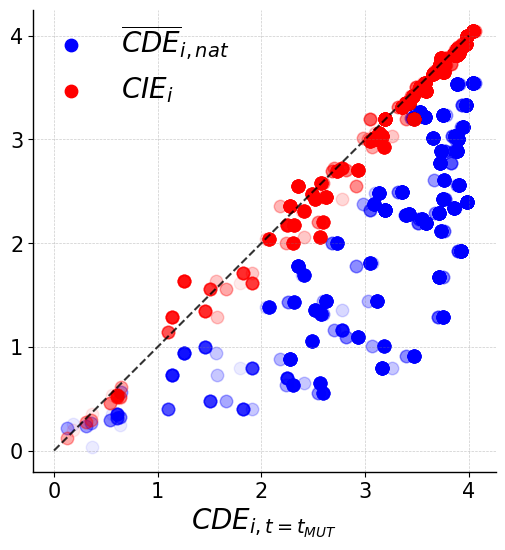

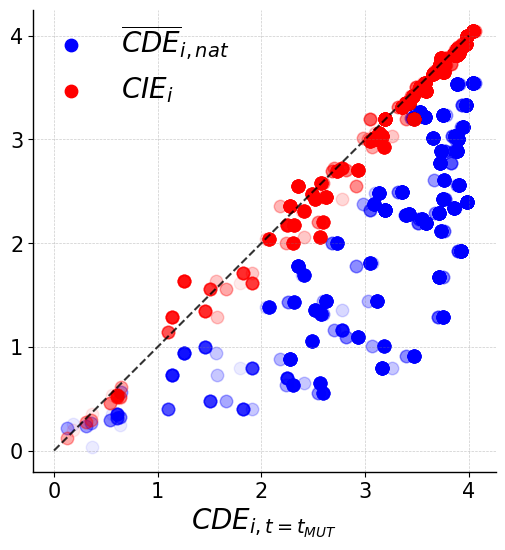

In [8]:
close("all")

pointsize = 80
transp = 0.08
transp2 = 0.8

lab = [0,1,2,3,4]
lab2 = [0,1,2]
labx = [10^1,10^2,10^3,10^4]
axis_width = 1.

ticks_font = 15
axis_font = 20

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

ax1 = plt.subplot2grid(shape=(1,1), loc=(0, 0), colspan = 1, rowspan= 1)
ax1.plot([0, 4.0], [0, 4.0], linestyle="--", alpha = transp2, color = "black")
ax1.scatter(mut_df[:, 5], mut_df[:, 6], color = "blue", s = pointsize, alpha = transp)
ax1.scatter(mut_df[:, 5], mut_df[:, 8], color = "red", s = pointsize, alpha = transp)

ax1.scatter(mut_df[1, 5], mut_df[1, 6], color = "blue", s = pointsize, 
label = "\$\\overline{CDE}_{i,nat}\$")
ax1.scatter(mut_df[1, 5], mut_df[1, 8], color = "red", s = pointsize,  
label = "\$CIE_{i}\$")



ax1.set_xticks([0,1,2,3,4])
ax1.set_yticks([0,1,2,3,4])
ax1.set_xticklabels(lab, fontsize = ticks_font)
ax1.set_yticklabels(lab, fontsize = ticks_font)
ax1.spines["top"].set_visible(false)
ax1.spines["right"].set_visible(false)
ax1.spines["left"].set_linewidth(axis_width)
ax1.spines["bottom"].set_linewidth(axis_width)
ax1.set_aspect("equal")
ax1.set_xlabel("\$CDE_{i,t=t_{MUT}}\$", fontsize=axis_font)
ax1.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
fig.legend(fontsize = axis_font, frameon = false, ncol = 1, bbox_to_anchor=(0.5,0.9))

#savefig("../data/figures/suppl_3A.png", dpi = 300, bbox_inches="tight")
gcf()

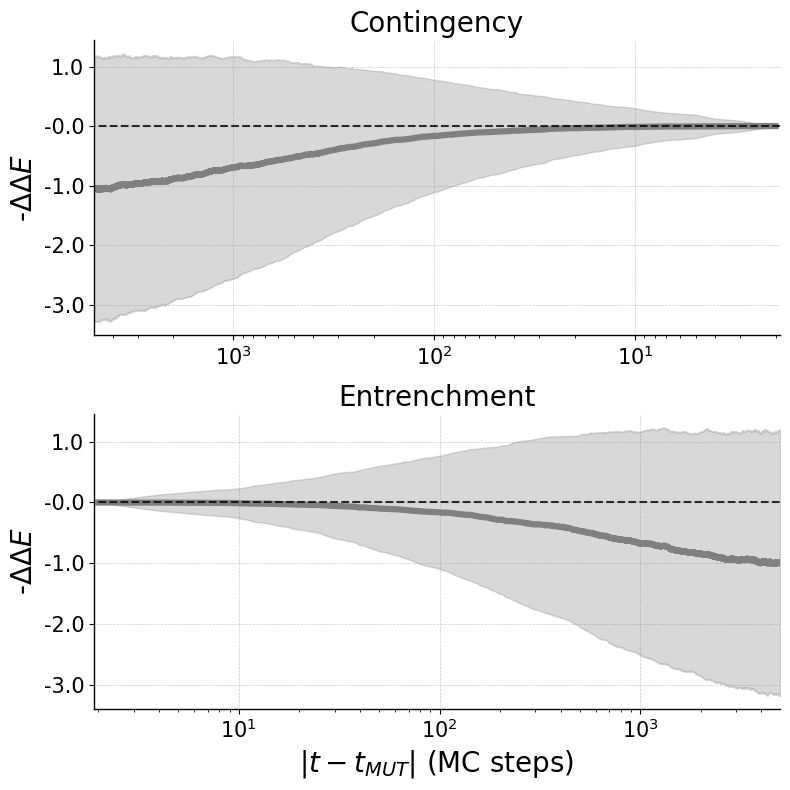

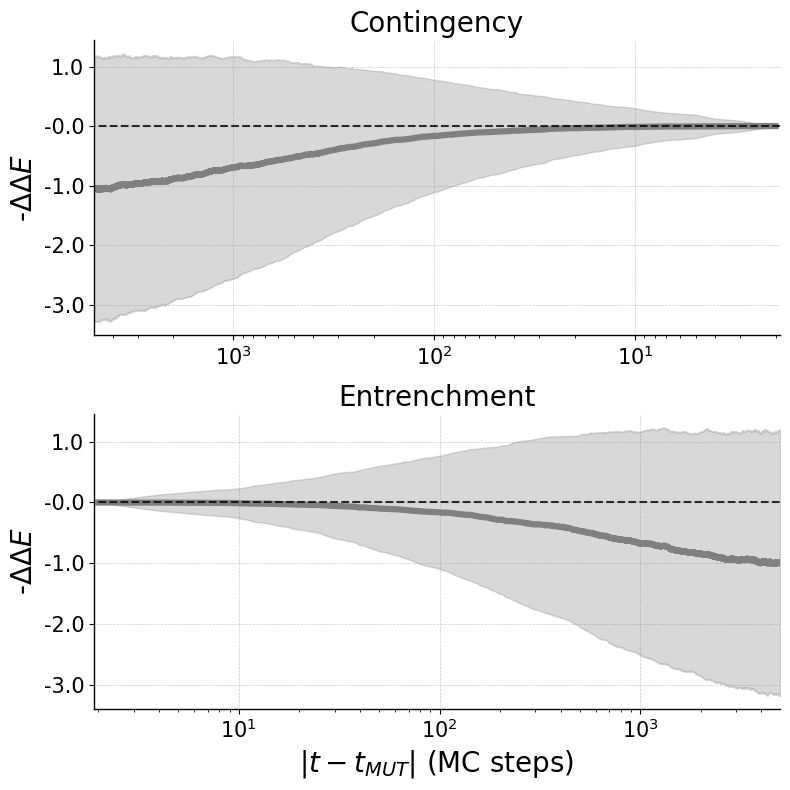

In [4]:
close("all")

pointsize = 80
transp = 0.8
transp2 = 0.8

lab = -1 .*[-1.,0.,1.,2.,3.]
lab2 = lab
labx = [1,10^1,10^2,10^3,10^4]
axis_width = 1.

ticks_font = 15
axis_font = 20

spessore = 4.5


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)


#ax1 = plt.subplot2grid(shape=(6, 4), loc=(2, 0), colspan = 3, rowspan= 2)
ax2 = plt.subplot2grid(shape=(2, 1), loc=(0, 0), colspan = 1, rowspan= 1)
ax3 = plt.subplot2grid(shape=(2, 1), loc=(1, 0), colspan = 1, rowspan= 1)
fig.subplots_adjust(hspace=0.8)


y = .-mean(cont .- cont[:,end], dims = 1)[:]
err_y = std(cont .- cont[:,end], dims = 1)[:]
ax2.plot(reverse(X), y, linewidth = spessore, color = "grey", label = "All muts")
ax2.fill_between(reverse(X), y .- err_y, y .+ err_y, alpha=0.3, color = "grey")
ax2.plot([0, maximum(X)], [0, 0], linestyle="--", alpha = transp2, color = "black")
ax2.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
#ax2.set_xlabel("Backward Monte Carlo steps", fontsize=axis_font)
ax2.set_ylabel("-\$\\Delta\$\$\\Delta{E}\$", fontsize=axis_font)
ax2.set_xticks(labx)
ax2.set_xticklabels(labx, fontsize = ticks_font)
ax2.set_yticks(lab2)
ax2.set_yticklabels(lab2, fontsize = ticks_font)
ax2.set_xlim(minimum(X)-0.1,maximum(X))
ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.set_xscale("log")
ax2.set_title("Contingency", fontsize = axis_font)
ax2.invert_xaxis()

y = .- mean(entren  .- entren[:,1], dims = 1)[:]
err_y = std(entren .- entren[:,1], dims = 1)[:]
ax3.plot(X, y, linewidth = spessore, color = "grey")
ax3.fill_between(X, y .- err_y, y .+ err_y, alpha=0.3, color = "grey")
ax3.plot([0, maximum(X)], [0, 0], linestyle="--", alpha = transp2, color = "black")
ax3.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax3.set_xlabel("|\$t-t_{MUT}\$| (MC steps)", fontsize=axis_font)
ax3.set_ylabel("-\$\\Delta\$\$\\Delta{E}\$", fontsize=axis_font)
ax3.set_xticks(labx)
ax3.set_xticklabels(labx, fontsize = ticks_font)
ax3.set_yticks(lab2)
ax3.set_yticklabels(lab2, fontsize = ticks_font)
ax3.set_xlim(minimum(X)-0.1,maximum(X))
ax3.spines["top"].set_visible(false)
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_linewidth(axis_width)
ax3.spines["bottom"].set_linewidth(axis_width)
ax3.set_xscale("log")
ax3.set_title("Entrenchment", fontsize = axis_font)

tight_layout()

savefig("../data/figures/suppl_3BC.png", dpi = 300, bbox_inches="tight")
gcf()